# Install dependencies

In [3]:
!apt install swig cmake

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.1).
Suggested packages:
  swig-doc swig-examples swig4.0-examples swig4.0-doc
The following NEW packages will be installed:
  swig swig4.0
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 1,116 kB of archives.
After this operation, 5,542 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig4.0 amd64 4.0.2-1ubuntu1 [1,110 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 swig all 4.0.2-1ubuntu1 [5,632 B]
Fetched 1,116 kB in 1s (2,218 kB/s)
Selecting previously unselected package swig4.0.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubu

In [4]:
!pip install -r https://raw.githubusercontent.com/huggingface/deep-rl-class/main/notebooks/unit1/requirements-unit1.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 62.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of gymnasium[box2d] to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 43.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 45.5 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2349114 sha256=d2e3bc5cda25057d88376c655937563af016c1dba70cbdb65bce9006a69141dd
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf05

In [5]:
!sudo apt-get update
!sudo apt-get install -y python3-opengl
!apt install ffmpeg
!apt install xvfb
!pip3 install pyvirtualdisplay

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:7 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1,335 kB]
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,605 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.6 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

## Import libraries

In [6]:
import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np

from gymnasium import Wrapper

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback

# Lunar Lander Environment
## Observation Space
- Horizontal pad coordinate (x)
- Vertical pad coordinate (y)
- Horizontal speed (x)
- Vertical speed (y)
- Angle
- Angular speed
- If the left leg contact point has touched the land (boolean)
- If the right leg contact point has touched the land (boolean)

### Action Space
- Action 0: Do nothing,
- Action 1: Fire left orientation engine,
- Action 2: Fire the main engine,
- Action 3: Fire right orientation engine.

### Reward function for each step (Default)
- Is increased/decreased the closer/further the lander is to the landing pad.
- Is increased/decreased the slower/faster the lander is moving.
- Is decreased the more the lander is tilted (angle not horizontal).
- Is increased by 10 points for each leg that is in contact with the ground.
- Is decreased by 0.3 points each frame the main engine is firing.
- Is decreased by 0.03 points for each side engine firing
- Is increased by 100 points for landing safely
- Is decreased by 100 points for crashing

### Reward function for each step (Custom)
- Is increased by 100 points for each leg that is in contact with the ground.
- Is decreased by 0.3 points each frame the main engine is firing.
- Is increased by 100 points for landing safely
- Is decreased by 100 points for crashing

### Reward function for each step (Combined)
- Is increased/decreased the closer/further the lander is to the landing pad.
- Is increased/decreased the slower/faster the lander is moving.
- Is decreased the more the lander is tilted (angle not horizontal).
- Is increased by 100 points for each leg that is in contact with the ground.
- Is decreased by 0.3 points each frame the main engine is firing.
- Is decreased by 0.03 points for each side engine firing
- Is increased by 100 points for landing safely
- Is decreased by 100 points for crashing

# Create Model, train and evaluate

## Functions:

### CustomCallback()
CustomCallback is a subclass of BaseCallback used within the Stable Baselines 3 framework for tracking and custom actions during training of a reinforcement learning model. This particular implementation of CustomCallback is designed to collect and print the rewards for each episode. During the training process, it iterates over the infos array obtained from the training environment (which is vectorized by DummyVecEnv). When an episode ends, it extracts and logs the episode's total reward and appends it to the training_rewards list. This callback is useful for real-time monitoring of the model's learning progress on a per-episode basis.

### evaluate_model()
 evaluate_model function is a utility to assess a trained reinforcement learning model's performance. It creates a separate Monitor-wrapped Gym environment, which is the default LunarLander-v2 in this case. The function uses the evaluate_policy method from Stable Baselines 3 to calculate the mean and standard deviation of rewards over a specified number of episodes (controlled by num_episodes). The deterministic parameter dictates whether the model's predictions should be deterministic. After evaluation, the environment is closed. The function returns the calculated mean and standard deviation, providing insights into the model's effectiveness and consistency in the evaluation environment.


## Results:
For each model, I plotted two learning curves (training&evaluation rewards across episodes, evaluation rewards across episodes)


 ## Other points to note:
 PPO only updates policy after a specific number of steps (n_steps). Evaluation is done after every 4 policy updates. Number of episodes in between policy updates isn't consistent. To determine total number of policy updates, see 'Number of Evaluations' at the end of the training output. Alternatively, use ceil(total_iterations/eval_freq). I performed a total of 1.5 mil iterations for each experiment, so 367 policy updates and evaluations. Final mean validation reward is done again after the entire training procedure.
 Also, by default, stable baseline 3 uses vectorised environments. For simplicity sake, I have set number of environments to 1 in the vectorised env variable that is used for training. However for evaluation, I used a vectorised env consisting of 10 differnet environments for a better evaluation of the model.

## 1. Env and model with default rewards

In [186]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

env1 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = env1,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [187]:
callback = CustomCallback()
total_timesteps = 1500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_count1 = 0
train_episode_rewards1 = []  # List to store (episode_number, reward)
eval_episode_rewards1 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewards1.append((train_episode_count1, r)) # record training rewards and its corresponding episode
        train_episode_count1 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewards1.append((train_episode_count1, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewards1))
    print("Number of elapsed episodes: ", train_episode_count1)

Streaming output truncated to the last 5000 lines.
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 346         |
|    ep_rew_mean          | 222         |
| time/                   |             |
|    fps                  | 754         |
|    iterations           | 4           |
|    time_elapsed         | 5           |
|    total_timesteps      | 1273856     |
| train/                  |             |
|    approx_kl            | 0.011779932 |
|    clip_fraction        | 0.0471      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.55       |
|    explained_variance   | 0.968       |
|    learning_rate        | 0.0003      |
|    loss                 | 59.4        |
|    n_updates            | 4972        |
|    policy_gradient_loss | -0.00058    |
|    value_loss           | 93.1        |
-----------------------------------------
Evaluation reward:  249.67376533333336
Number of evaluations thus f

Final training reward:  304.202014
Final mean validation reward:  275.3843445


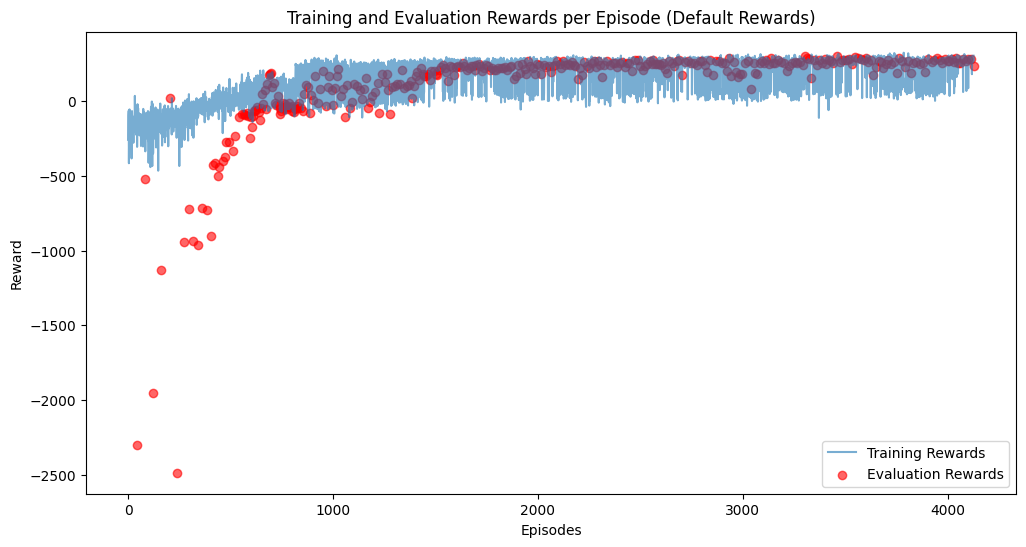

In [193]:
# Unpack episode numbers and rewards for training
train_episodes1, train_rewards1 = zip(*train_episode_rewards1)
print('Final training reward: ', train_rewards1[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodes1, eval_rewards1 = zip(*eval_episode_rewards1)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_reward1, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_reward1)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodes1, train_rewards1, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodes1, eval_rewards1, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Default Rewards)')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


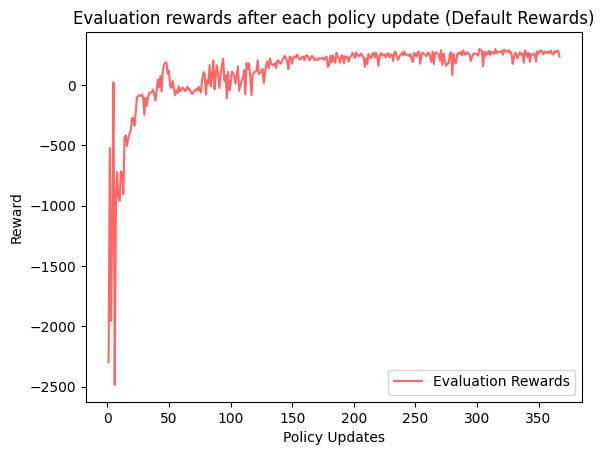

In [190]:
# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewards1)+1), eval_rewards1, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Default Rewards)')
plt.legend()
plt.show()

In [191]:
model_name = "ppo-LunarLander-v2_default"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default"
model.save(drive_model_path)

np.save("train_episode_rewards1.npy", train_episode_rewards1)
np.save("eval_episode_rewards1.npy", eval_episode_rewards1)
files.download('/content/train_episode_rewards1.npy')
files.download('/content/eval_episode_rewards1.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards1.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards1.npy"
model.save(drive_model_path)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2. Env and model with custom rewards

### CustomRewardWrapper
The CustomRewardWrapper is a specialized class that extends the Wrapper class, specifically designed for modifying the reward structure in a Gym environment. In this implementation, tailored for the "LunarLander-v2" environment, it adjusts the rewards based on specific conditions of the lander's state. The custom reward logic includes awarding 100 points for each leg making ground contact, thus incentivizing safe landing. It also includes a slight penalty for using the main engine (identified by MAIN_ENGINE_ACTION), to promote fuel efficiency. Additionally, this wrapper ensures that the original rewards for successful landing or crashing (determined by the terminal state of the episode) are preserved and added to the custom reward. This approach allows for a nuanced modification of the reward system, encouraging behaviors like safe landing and fuel efficiency while still adhering to the game's fundamental objectives.

In [159]:
class CustomRewardWrapper(Wrapper):
    def __init__(self, env):
        super(CustomRewardWrapper, self).__init__(env)

    def step(self, action):
        state, original_reward, truncated, terminated, info = self.env.step(action)
        reward = self.custom_reward(state, terminated or truncated, action, original_reward)
        return state, reward, truncated, terminated, info

    def custom_reward(self, state, is_terminal, action, original_reward):
        (_, _, _, _, _, _, leg_1_contact, leg_2_contact) = state

        reward = 0 # force reward to be 0 to exclude other default rewards
        # Reward for leg contact
        if leg_1_contact:
            reward += 100
        if leg_2_contact:
            reward += 100

        # Penalty for firing the main engine
        # Assuming that a specific action number represents firing the main engine
        MAIN_ENGINE_ACTION = 2  # Replace with the correct action index for firing the main engine
        if action == MAIN_ENGINE_ACTION:
            reward -= 0.3 # actually can just use default but nvm

        # Use the environment's own criteria for successful landing and crashing
        if is_terminal:
            reward += original_reward

        return reward

class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = make_env() # env wrapped with custom rewards

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

def make_env():
    env = Monitor(gym.make("LunarLander-v2")) # check this to see if there's a problem with wrapping Monitor here
    env = CustomRewardWrapper(env)
    return env

# not vectorised env (autovecotrised later)
env2 = make_env()

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = env2,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [160]:
callback = CustomCallback()
total_timesteps = 1500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_count2 = 0
train_episode_rewards2 = []  # List to store (episode_number, reward)
eval_episode_rewards2 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewards2.append((train_episode_count2, r)) # record training rewards and its corresponding episode
        train_episode_count2 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewards2.append((train_episode_count2, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewards2))
    print("Number of elapsed episodes: ", train_episode_count2)

Streaming output truncated to the last 5000 lines.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 186      |
|    ep_rew_mean     | -78      |
| time/              |          |
|    fps             | 1023     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 1295360  |
---------------------------------
Episode data: -328.877268
Episode data: -205.269709
Episode data: 14.568927
Episode data: -83.087606
Episode data: -198.515692
Episode data: -54.254142
Episode data: 12.222142
Episode data: -74.201403
Episode data: -9.454356
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 178           |
|    ep_rew_mean          | -80.2         |
| time/                   |               |
|    fps                  | 906           |
|    iterations           | 2             |
|    time_elapsed         | 2             |
|    total_timesteps      | 1296

Final training reward:  24.515581
Final mean validation reward:  206.50135799999998


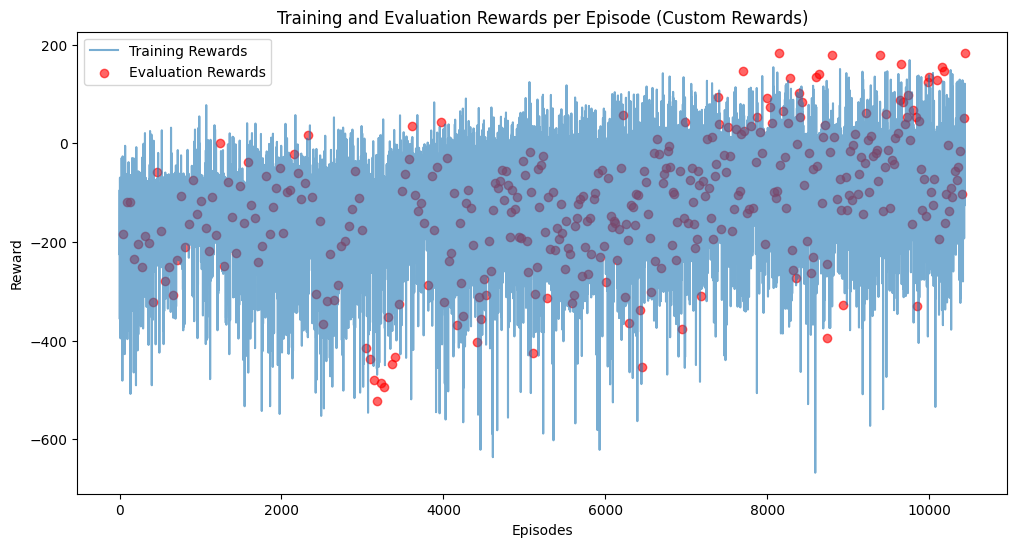

In [183]:
# Unpack episode numbers and rewards for training
train_episodes2, train_rewards2 = zip(*train_episode_rewards2)
print('Final training reward: ', train_rewards2[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodes2, eval_rewards2 = zip(*eval_episode_rewards2)

# Evaluation reward
eval_env = make_env() # ensure environment is wrapped by custom wrapper
mean_reward2, _ = evaluate_policy(model, eval_env, n_eval_episodes=1, deterministic=True)
print(f"Final mean validation reward: ", mean_reward2)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodes2, train_rewards2, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodes2, eval_rewards2, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Custom Rewards)')
plt.legend()
plt.show()

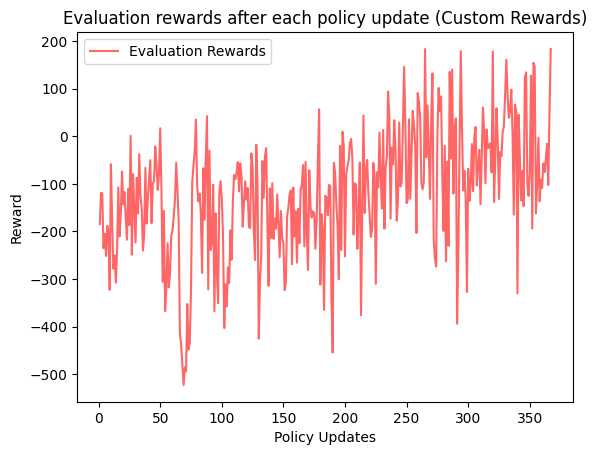

In [184]:
# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewards2)+1), eval_rewards2, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Custom Rewards)')
plt.legend()
plt.show()

In [185]:
model_name = "ppo-LunarLander-v2_custom"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_custom.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_custom"
model.save(drive_model_path)

np.save("train_episode_rewards2.npy", train_episode_rewards2)
np.save("eval_episode_rewards2.npy", eval_episode_rewards2)
files.download('/content/train_episode_rewards2.npy')
files.download('/content/eval_episode_rewards2.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards2.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards2.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 3. Env and model with combination of both default and custom rewards

### CustomRewardWrapper
The revise CustomerRewardWrapper only modifies the rewards given for each leg contact.

In [139]:
class CustomRewardWrapper(Wrapper):
    def __init__(self, env):
        super(CustomRewardWrapper, self).__init__(env)

    def step(self, action):
        state, original_reward, truncated, terminated, info = self.env.step(action)
        reward = self.custom_reward(state, terminated or truncated, action, original_reward)
        return state, reward, truncated, terminated, info

    def custom_reward(self, state, is_terminal, action, original_reward):
        (_, _, _, _, _, _, leg_1_contact, leg_2_contact) = state

        reward = original_reward # maintain original rewards
        # Reward for leg contact
        if leg_1_contact:
            reward += 90 # default was +10
        if leg_2_contact:
            reward += 90 # default was +10

        return reward

class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = make_env() # env wrapped with custom rewards

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

def make_env():
    env = Monitor(gym.make("LunarLander-v2")) # check this to see if there's a problem with wrapping Monitor here
    env = CustomRewardWrapper(env)
    return env

# not vectorised env (autovecotrised later)
env3 = make_env()

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = env3,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1)

Using cpu device
Wrapping the env in a DummyVecEnv.


In [140]:
callback = CustomCallback()
total_timesteps = 1500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_count3 = 0
train_episode_rewards3 = []  # List to store (episode_number, reward)
eval_episode_rewards3 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewards3.append((train_episode_count3, r)) # record training rewards and its corresponding episode
        train_episode_count3 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewards3.append((train_episode_count3, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewards3))
    print("Number of elapsed episodes: ", train_episode_count3)

Streaming output truncated to the last 5000 lines.
|    ep_rew_mean     | -0.909   |
| time/              |          |
|    fps             | 1008     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 1278976  |
---------------------------------
Episode data: -35.994051
Episode data: -16.600936
Episode data: -55.215305
Episode data: -16.647117
Episode data: -83.159977
Episode data: 19.508244
Episode data: -1.540491
Episode data: 50.466795
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 290          |
|    ep_rew_mean          | -4.16        |
| time/                   |              |
|    fps                  | 888          |
|    iterations           | 2            |
|    time_elapsed         | 2            |
|    total_timesteps      | 1280000      |
| train/                  |              |
|    approx_kl            | 4.655216e-06 |
|    clip_fraction        | 0            

Final training reward:  44.82707
Final mean validation reward:  233.878971


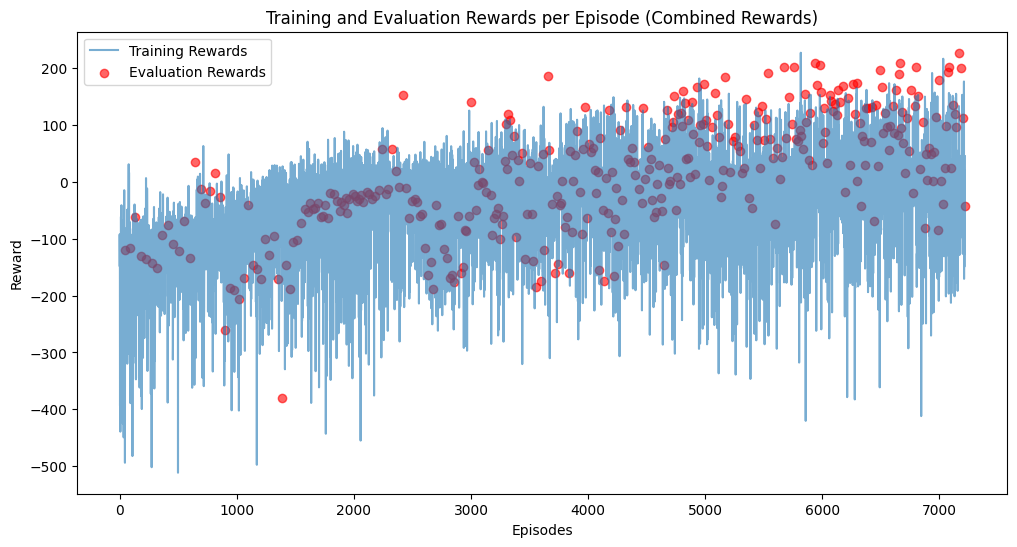

In [155]:
# Unpack episode numbers and rewards for training
train_episodes3, train_rewards3 = zip(*train_episode_rewards3)
print('Final training reward: ', train_rewards2[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodes3, eval_rewards3 = zip(*eval_episode_rewards3)

# Evaluation reward
eval_env = make_env() # ensure environment is wrapped by custom wrapper
mean_reward3, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True)
print(f"Final mean validation reward: ", mean_reward3)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodes3, train_rewards3, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodes3, eval_rewards3, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Combined Rewards)')
plt.legend()
plt.show()

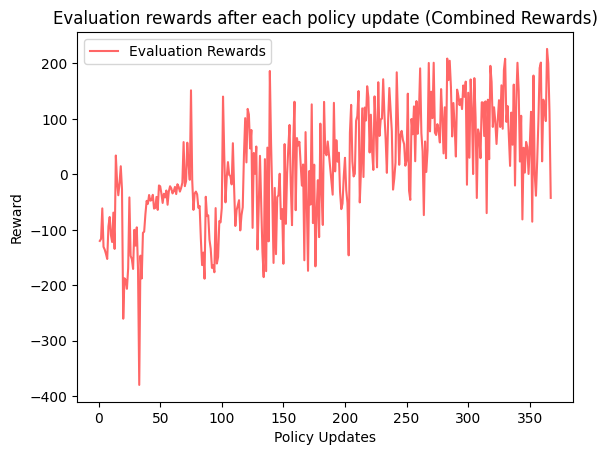

In [157]:
# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewards3)+1), eval_rewards3, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Combined Rewards)')
plt.legend()
plt.show()

In [156]:
model_name = "ppo-LunarLander-v2_combined"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_combined.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_combined"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
np.save("train_episode_rewards3.npy", train_episode_rewards3)
np.save("eval_episode_rewards3.npy", eval_episode_rewards3)
files.download('/content/train_episode_rewards3.npy')
files.download('/content/eval_episode_rewards3.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards3.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards3.npy"
model.save(drive_model_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Hyperparameter tuning
Given how the model with default rewards seem to learn the fastest and perform the best, the following hyperparamter tuning experiments will be performed with that model.Total iterations was truncated to 500000.

## A. Learning Rate (0.001, 0.01, 0.0003)
0.0003 is the default that was used in earlier experiments

### 1. Learning rate 0.001

In [199]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

enva1 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = enva1,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    learning_rate = 0.001) # Learning rate of 0.001

Using cpu device
Wrapping the env in a DummyVecEnv.


In [200]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_counta1 = 0
train_episode_rewardsa1 = []  # List to store (episode_number, reward)
eval_episode_rewardsa1 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsa1.append((train_episode_counta1, r)) # record training rewards and its corresponding episode
        train_episode_counta1 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsa1.append((train_episode_counta1, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsa1))
    print("Number of elapsed episodes: ", train_episode_counta1)

Streaming output truncated to the last 5000 lines.
| train/                  |             |
|    approx_kl            | 0.010374419 |
|    clip_fraction        | 0.0762      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.844      |
|    explained_variance   | 0.99        |
|    learning_rate        | 0.001       |
|    loss                 | 0.935       |
|    n_updates            | 1004        |
|    policy_gradient_loss | -0.00159    |
|    value_loss           | 3.85        |
-----------------------------------------
Evaluation reward:  83.35669666666666
Number of evaluations thus far:  63
Number of elapsed episodes:  566
Episode data: 101.243112
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 823      |
|    ep_rew_mean     | 73.1     |
| time/              |          |
|    fps             | 759      |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 259072   |
-------

Final training reward:  238.573638
Final mean validation reward:  225.72435


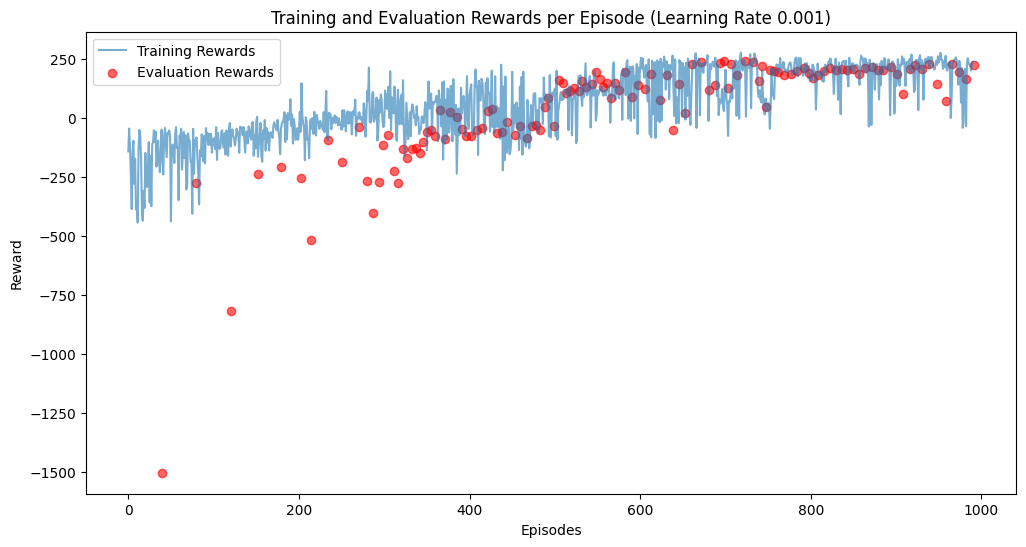

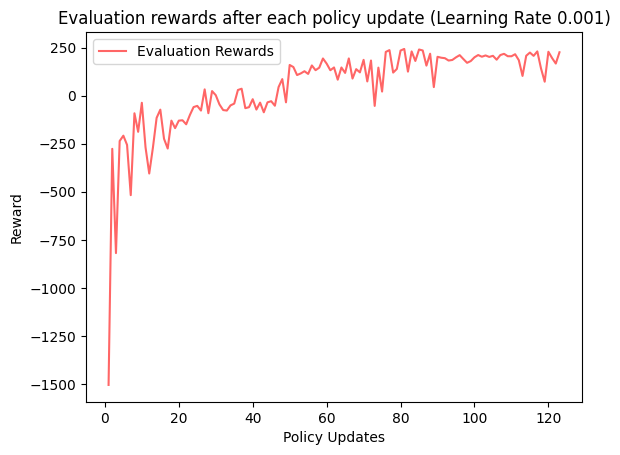

In [203]:
# Unpack episode numbers and rewards for training
train_episodesa1, train_rewardsa1 = zip(*train_episode_rewardsa1)
print('Final training reward: ', train_rewardsa1[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodesa1, eval_rewardsa1 = zip(*eval_episode_rewardsa1)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_rewarda1, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_rewarda1)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodesa1, train_rewardsa1, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodesa1, eval_rewardsa1, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Learning Rate 0.001)')
plt.legend()
plt.show()

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewardsa1)+1), eval_rewardsa1, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Learning Rate 0.001)')
plt.legend()
plt.show()

In [204]:
model_name = "ppo-LunarLander-v2_default_a1"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default_a1.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default_a1"
model.save(drive_model_path)

np.save("train_episode_rewards_a1.npy", train_episode_rewardsa1)
np.save("eval_episode_rewards_a1.npy", eval_episode_rewardsa1)
files.download('/content/train_episode_rewards_a1.npy')
files.download('/content/eval_episode_rewards_a1.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards_a1.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards_a1.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. Learning rate 0.01

In [205]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

enva2 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = enva2,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    learning_rate = 0.01) # Learning rate of 0.01

Using cpu device
Wrapping the env in a DummyVecEnv.


In [206]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_counta2 = 0
train_episode_rewardsa2 = []  # List to store (episode_number, reward)
eval_episode_rewardsa2 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsa2.append((train_episode_counta2, r)) # record training rewards and its corresponding episode
        train_episode_counta2 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsa2.append((train_episode_counta2, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsa2))
    print("Number of elapsed episodes: ", train_episode_counta2)

Streaming output truncated to the last 5000 lines.
|    policy_gradient_loss | -0.0021     |
|    value_loss           | 84.7        |
-----------------------------------------
Episode data: -174.732485
Episode data: -236.123488
Episode data: -164.536083
---------------------------------------
| rollout/                |           |
|    ep_len_mean          | 313       |
|    ep_rew_mean          | -214      |
| time/                   |           |
|    fps                  | 334       |
|    iterations           | 3         |
|    time_elapsed         | 9         |
|    total_timesteps      | 277504    |
| train/                  |           |
|    approx_kl            | 0.2423503 |
|    clip_fraction        | 0.527     |
|    clip_range           | 0.2       |
|    entropy_loss         | -1.01     |
|    explained_variance   | 0.76      |
|    learning_rate        | 0.01      |
|    loss                 | 4.97      |
|    n_updates            | 1080      |
|    policy_gradient_loss

Final training reward:  -507.678694
Final mean validation reward:  -619.8269975999999


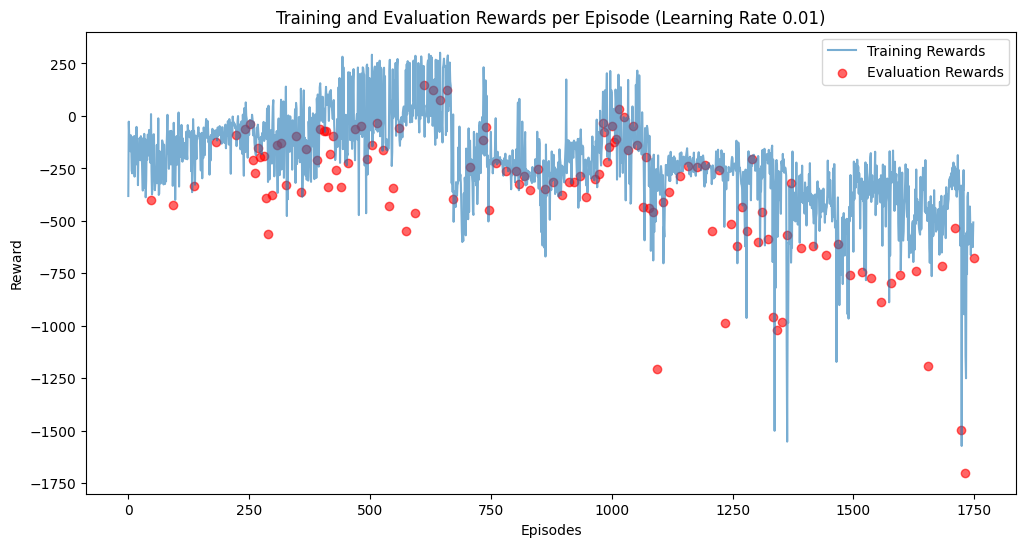

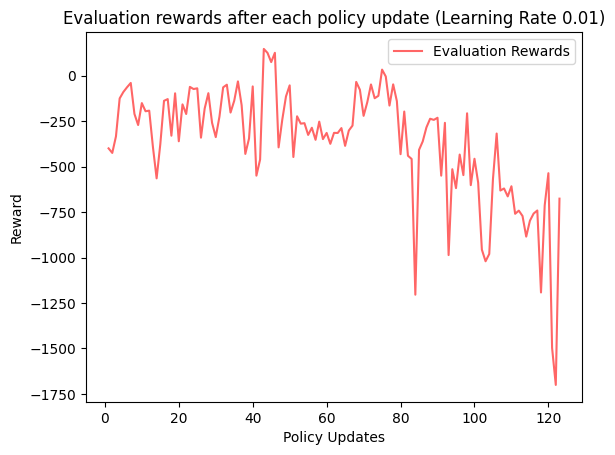

In [207]:
# Unpack episode numbers and rewards for training
train_episodesa2, train_rewardsa2 = zip(*train_episode_rewardsa2)
print('Final training reward: ', train_rewardsa2[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodesa2, eval_rewardsa2 = zip(*eval_episode_rewardsa2)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_rewarda2, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_rewarda2)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodesa2, train_rewardsa2, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodesa2, eval_rewardsa2, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Learning Rate 0.01)')
plt.legend()
plt.show()

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewardsa2)+1), eval_rewardsa2, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Learning Rate 0.01)')
plt.legend()
plt.show()

In [208]:
model_name = "ppo-LunarLander-v2_default_a2"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default_a2.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default_a2"
model.save(drive_model_path)

np.save("train_episode_rewards_a2.npy", train_episode_rewardsa2)
np.save("eval_episode_rewards_a2.npy", eval_episode_rewardsa2)
files.download('/content/train_episode_rewards_a2.npy')
files.download('/content/eval_episode_rewards_a2.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards_a2.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards_a2.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. Learning rate 0.0003 (From above)

In [209]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

enva3 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = enva3,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999,
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    learning_rate = 0.0003) # Learning rate of 0.0003

Using cpu device
Wrapping the env in a DummyVecEnv.


In [210]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_counta3 = 0
train_episode_rewardsa3 = []  # List to store (episode_number, reward)
eval_episode_rewardsa3 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsa3.append((train_episode_counta3, r)) # record training rewards and its corresponding episode
        train_episode_counta3 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsa3.append((train_episode_counta3, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsa3))
    print("Number of elapsed episodes: ", train_episode_counta3)

Streaming output truncated to the last 5000 lines.
| time/              |          |
|    fps             | 1038     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 263168   |
---------------------------------
Episode data: 133.794897
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 646          |
|    ep_rew_mean          | 38           |
| time/                   |              |
|    fps                  | 920          |
|    iterations           | 2            |
|    time_elapsed         | 2            |
|    total_timesteps      | 264192       |
| train/                  |              |
|    approx_kl            | 0.0022971719 |
|    clip_fraction        | 0.0295       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.871       |
|    explained_variance   | 0.624        |
|    learning_rate        | 0.0003       |
|    loss                 | 67.2

Final training reward:  22.072786
Final mean validation reward:  218.442436


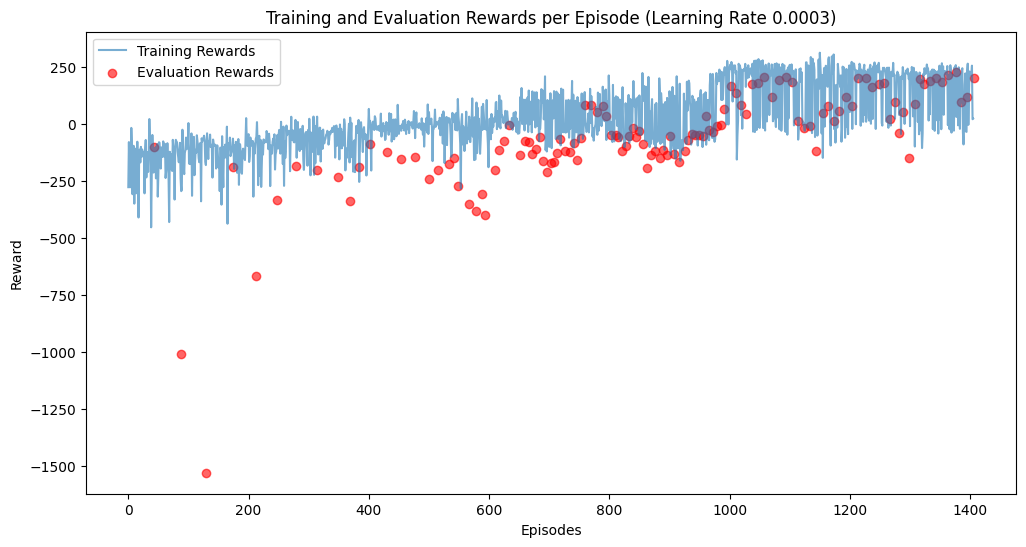

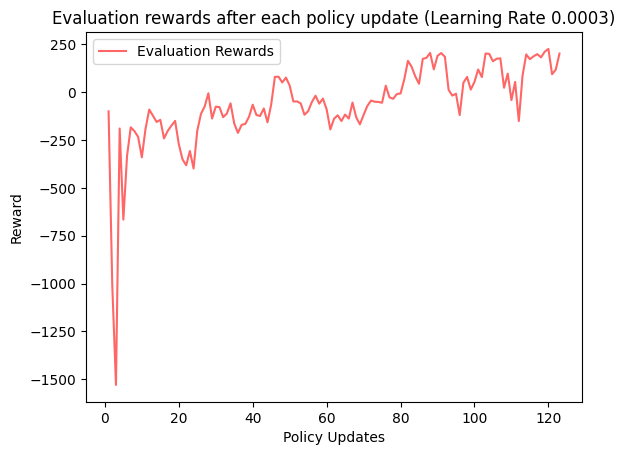

In [213]:
# Unpack episode numbers and rewards for training
train_episodesa3, train_rewardsa3 = zip(*train_episode_rewardsa3)
print('Final training reward: ', train_rewardsa3[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodesa3, eval_rewardsa3 = zip(*eval_episode_rewardsa3)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_rewarda3, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_rewarda3)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodesa3, train_rewardsa3, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodesa3, eval_rewardsa3, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Learning Rate 0.0003)')
plt.legend()
plt.show()

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewardsa3)+1), eval_rewardsa3, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Learning Rate 0.0003)')
plt.legend()
plt.show()

In [214]:
model_name = "ppo-LunarLander-v2_default_a3"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default_a3.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default_a3"
model.save(drive_model_path)

np.save("train_episode_rewards_a3.npy", train_episode_rewardsa3)
np.save("eval_episode_rewards_a3.npy", eval_episode_rewardsa3)
files.download('/content/train_episode_rewards_a3.npy')
files.download('/content/eval_episode_rewards_a3.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards_a3.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards_a3.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## B. Discount factor gamma (0.5, 0.7, 0.999)
0.999 was the discount factor used in earlier experiments. Learning rate was set to 0.001, the optimal based on the experiments above (highest eval reward and fastest convergence).

###1. Gamma 0.5

In [216]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

envb1 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = envb1,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.5, # Gamma of 0.5
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    learning_rate = 0.001) # Learning rate of 0.001

Using cpu device
Wrapping the env in a DummyVecEnv.


In [217]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_countb1 = 0
train_episode_rewardsb1 = []  # List to store (episode_number, reward)
eval_episode_rewardsb1 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsb1.append((train_episode_countb1, r)) # record training rewards and its corresponding episode
        train_episode_countb1 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsb1.append((train_episode_countb1, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsb1))
    print("Number of elapsed episodes: ", train_episode_countb1)

Streaming output truncated to the last 5000 lines.
|    loss                 | 7.91        |
|    n_updates            | 1032        |
|    policy_gradient_loss | 0.00295     |
|    value_loss           | 19.7        |
-----------------------------------------
Episode data: 235.873441
Episode data: -182.640387
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 445         |
|    ep_rew_mean          | 5.76        |
| time/                   |             |
|    fps                  | 799         |
|    iterations           | 4           |
|    time_elapsed         | 5           |
|    total_timesteps      | 266240      |
| train/                  |             |
|    approx_kl            | 0.014923896 |
|    clip_fraction        | 0.111       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.322      |
|    explained_variance   | 0.343       |
|    learning_rate        | 0.001       |
|    loss       

Final training reward:  -106.03238
Final mean validation reward:  160.561249


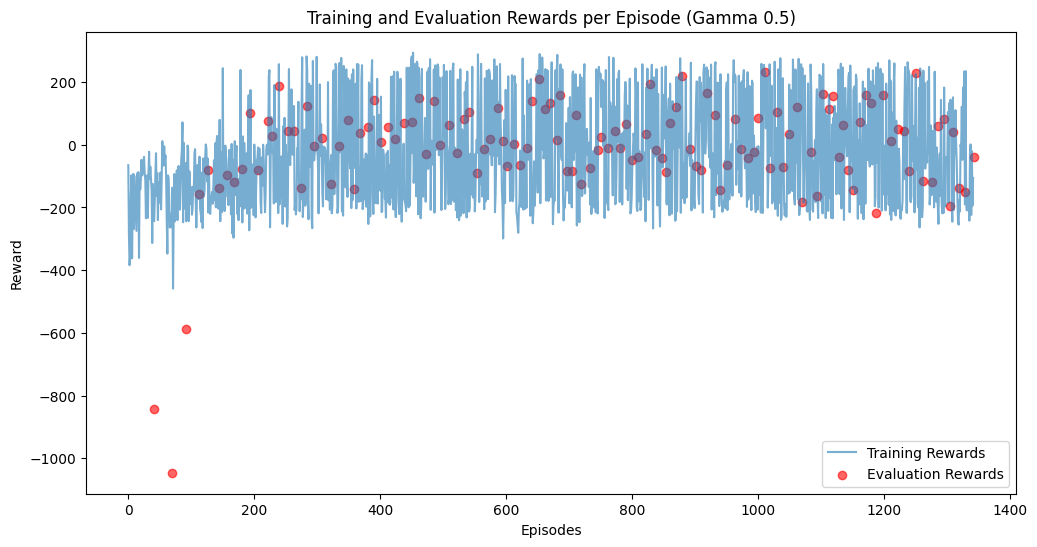

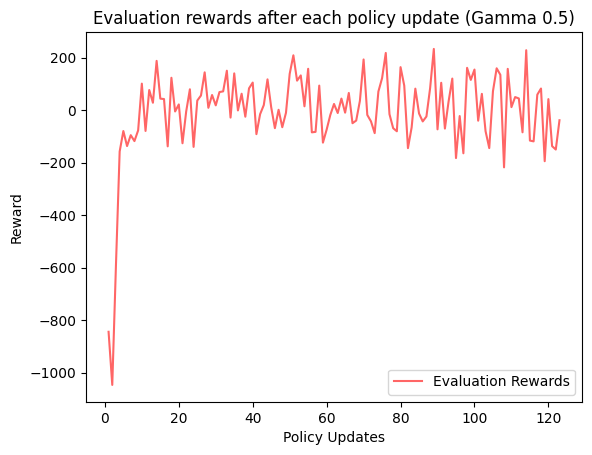

In [246]:
# Unpack episode numbers and rewards for training
train_episodesb1, train_rewardsb1 = zip(*train_episode_rewardsb1)
print('Final training reward: ', train_rewardsb1[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodesb1, eval_rewardsb1 = zip(*eval_episode_rewardsb1)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_rewardb1, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_rewardb1)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodesb1, train_rewardsb1, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodesb1, eval_rewardsb1, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Gamma 0.5)')
plt.legend()
plt.show()

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewardsb1)+1), eval_rewardsb1, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Gamma 0.5)')
plt.legend()
plt.show()

In [230]:
model_name = "ppo-LunarLander-v2_default_b1"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default_b1.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default_b1"
model.save(drive_model_path)

np.save("train_episode_rewards_b1.npy", train_episode_rewardsb1)
np.save("eval_episode_rewards_b1.npy", eval_episode_rewardsb1)
files.download('/content/train_episode_rewards_b1.npy')
files.download('/content/eval_episode_rewards_b1.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards_b1.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards_b1.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###2. Gamma 0.7

In [235]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

envb2 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = envb2,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.7, # Gamma of 0.7
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    learning_rate = 0.001) # Learning rate of 0.001

Using cpu device
Wrapping the env in a DummyVecEnv.


In [236]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_countb2 = 0
train_episode_rewardsb2 = []  # List to store (episode_number, reward)
eval_episode_rewardsb2 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsb2.append((train_episode_countb2, r)) # record training rewards and its corresponding episode
        train_episode_countb2 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsb2.append((train_episode_countb2, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsb2))
    print("Number of elapsed episodes: ", train_episode_countb2)

Streaming output truncated to the last 5000 lines.
|    clip_range           | 0.2         |
|    entropy_loss         | -0.444      |
|    explained_variance   | -0.0431     |
|    learning_rate        | 0.001       |
|    loss                 | 3.76        |
|    n_updates            | 1032        |
|    policy_gradient_loss | -0.00586    |
|    value_loss           | 28.2        |
-----------------------------------------
Episode data: 200.655226
Episode data: -197.996637
Episode data: 214.856397
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 398          |
|    ep_rew_mean          | -14.7        |
| time/                   |              |
|    fps                  | 711          |
|    iterations           | 4            |
|    time_elapsed         | 5            |
|    total_timesteps      | 266240       |
| train/                  |              |
|    approx_kl            | 0.0067635314 |
|    clip_fraction    

Final training reward:  -216.878527
Final mean validation reward:  185.2393837


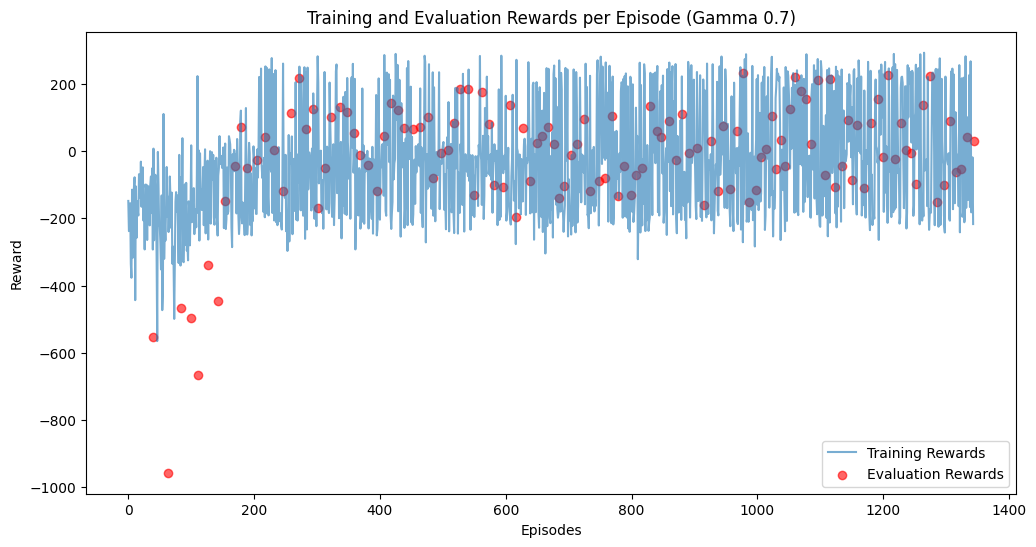

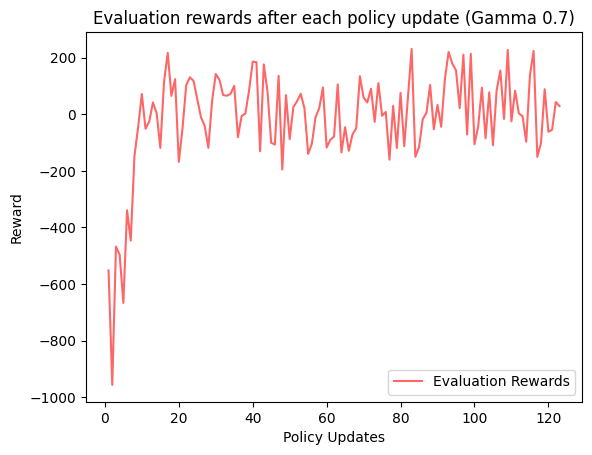

In [245]:
# Unpack episode numbers and rewards for training
train_episodesb2, train_rewardsb2 = zip(*train_episode_rewardsb2)
print('Final training reward: ', train_rewardsb2[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodesb2, eval_rewardsb2 = zip(*eval_episode_rewardsb2)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_rewardb2, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_rewardb2)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodesb2, train_rewardsb2, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodesb2, eval_rewardsb2, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Gamma 0.7)')
plt.legend()
plt.show()

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewardsb2)+1), eval_rewardsb2, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Gamma 0.7)')
plt.legend()
plt.show()

In [240]:
model_name = "ppo-LunarLander-v2_default_b2"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default_b2.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default_b2"
model.save(drive_model_path)

np.save("train_episode_rewards_b2.npy", train_episode_rewardsb2)
np.save("eval_episode_rewards_b2.npy", eval_episode_rewardsb2)
files.download('/content/train_episode_rewards_b2.npy')
files.download('/content/eval_episode_rewards_b2.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards_b2.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards_b2.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###3. Gamma 0.999

In [249]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

envb3 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = envb3,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999, # Gamma of 0.999
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    learning_rate = 0.001) # Learning rate of 0.001

Using cpu device
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [243]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_countb3 = 0
train_episode_rewardsb3 = []  # List to store (episode_number, reward)
eval_episode_rewardsb3 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsb3.append((train_episode_countb3, r)) # record training rewards and its corresponding episode
        train_episode_countb3 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsb3.append((train_episode_countb3, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsb3))
    print("Number of elapsed episodes: ", train_episode_countb3)

Streaming output truncated to the last 5000 lines.
| rollout/                |              |
|    ep_len_mean          | 819          |
|    ep_rew_mean          | 82.1         |
| time/                   |              |
|    fps                  | 743          |
|    iterations           | 2            |
|    time_elapsed         | 2            |
|    total_timesteps      | 260096       |
| train/                  |              |
|    approx_kl            | 0.0075417394 |
|    clip_fraction        | 0.135        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.843       |
|    explained_variance   | 0.983        |
|    learning_rate        | 0.001        |
|    loss                 | 2.14         |
|    n_updates            | 1012         |
|    policy_gradient_loss | -0.0113      |
|    value_loss           | 8.05         |
------------------------------------------
Episode data: 167.225403
-----------------------------------------
| rollout/            

In [250]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_countb3 = 0
train_episode_rewardsb3 = []  # List to store (episode_number, reward)
eval_episode_rewardsb3 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsb3.append((train_episode_countb3, r)) # record training rewards and its corresponding episode
        train_episode_countb3 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsb3.append((train_episode_countb3, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsb3))
    print("Number of elapsed episodes: ", train_episode_countb3)

Streaming output truncated to the last 5000 lines.
|    n_updates            | 980          |
|    policy_gradient_loss | -0.00161     |
|    value_loss           | 86.6         |
------------------------------------------
Episode data: 138.733913
Episode data: -64.790557
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 630          |
|    ep_rew_mean          | 161          |
| time/                   |              |
|    fps                  | 740          |
|    iterations           | 3            |
|    time_elapsed         | 4            |
|    total_timesteps      | 252928       |
| train/                  |              |
|    approx_kl            | 0.0026940987 |
|    clip_fraction        | 0.00562      |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.883       |
|    explained_variance   | 0.753        |
|    learning_rate        | 0.001        |
|    loss                 | 40         

Final training reward:  231.974884
Final mean validation reward:  221.4567332


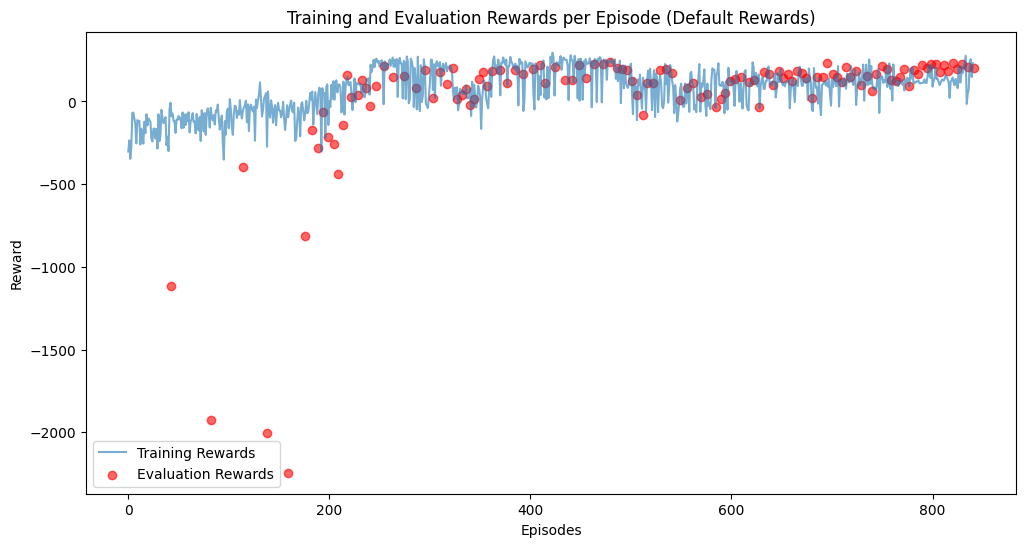

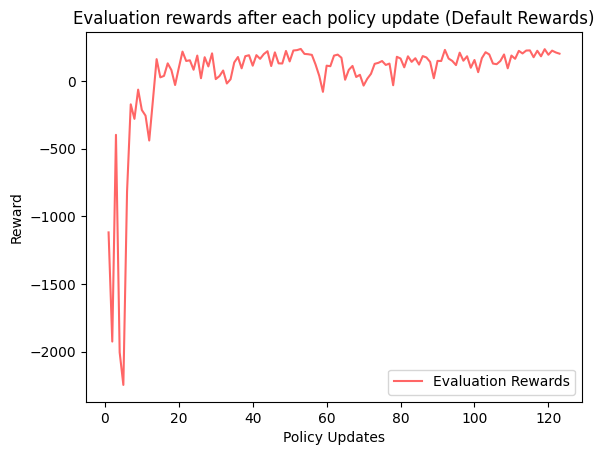

In [252]:
# Unpack episode numbers and rewards for training
train_episodesb3, train_rewardsb3 = zip(*train_episode_rewardsb3)
print('Final training reward: ', train_rewardsb3[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodesb3, eval_rewardsb3 = zip(*eval_episode_rewardsb3)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_rewardb3, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_rewardb3)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodesb3, train_rewardsb3, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodesb3, eval_rewardsb3, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Default Rewards)')
plt.legend()
plt.show()

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewardsb3)+1), eval_rewardsb3, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Default Rewards)')
plt.legend()
plt.show()

In [253]:
model_name = "ppo-LunarLander-v2_default_b3"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default_b3.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default_b3"
model.save(drive_model_path)

np.save("train_episode_rewards_b3.npy", train_episode_rewardsb3)
np.save("eval_episode_rewards_b3.npy", eval_episode_rewardsb3)
files.download('/content/train_episode_rewards_b3.npy')
files.download('/content/eval_episode_rewards_b3.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards_b3.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards_b3.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## C. Clip range (0.1, 0.3, 0.2)
0.2 is the default clip_range parameter. Batch size of 0.999 chosen due to fastest convergence, best reward value and most stable convergence.

### 1. Clip range 0.1

In [254]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

envc1 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = envc1,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999, # Gamma of 0.999
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    learning_rate = 0.001, # Learning rate of 0.001
    clip_range = 0.1) # clip_range of 0.1

Using cpu device
Wrapping the env in a DummyVecEnv.


In [255]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_countc1 = 0
train_episode_rewardsc1 = []  # List to store (episode_number, reward)
eval_episode_rewardsc1 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsc1.append((train_episode_countc1, r)) # record training rewards and its corresponding episode
        train_episode_countc1 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsc1.append((train_episode_countc1, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsc1))
    print("Number of elapsed episodes: ", train_episode_countc1)

Streaming output truncated to the last 5000 lines.
|    iterations           | 2           |
|    time_elapsed         | 2           |
|    total_timesteps      | 256000      |
| train/                  |             |
|    approx_kl            | 0.008703524 |
|    clip_fraction        | 0.199       |
|    clip_range           | 0.1         |
|    entropy_loss         | -0.749      |
|    explained_variance   | 0.308       |
|    learning_rate        | 0.001       |
|    loss                 | 178         |
|    n_updates            | 996         |
|    policy_gradient_loss | 0.00522     |
|    value_loss           | 980         |
-----------------------------------------
Episode data: 151.490763
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 535          |
|    ep_rew_mean          | 52.1         |
| time/                   |              |
|    fps                  | 769          |
|    iterations           | 3       

Final training reward:  142.52148
Final mean validation reward:  245.96651709999998


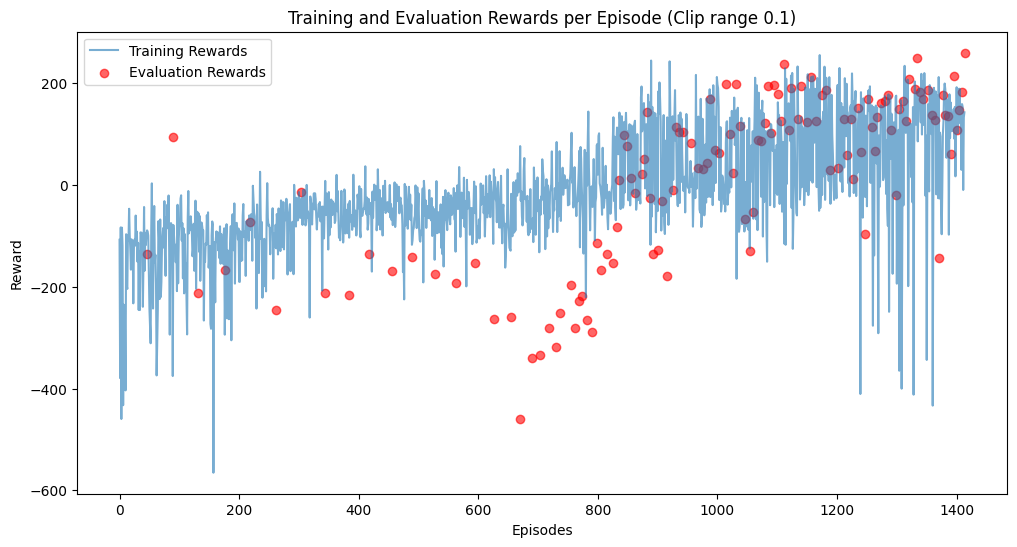

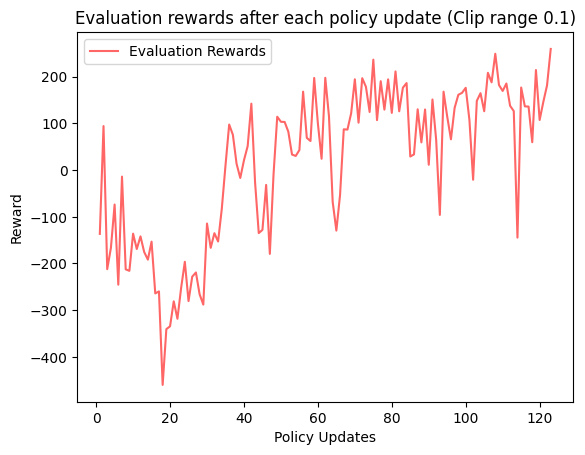

In [256]:
# Unpack episode numbers and rewards for training
train_episodesc1, train_rewardsc1 = zip(*train_episode_rewardsc1)
print('Final training reward: ', train_rewardsc1[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodesc1, eval_rewardsc1 = zip(*eval_episode_rewardsc1)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_rewardc1, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_rewardc1)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodesc1, train_rewardsc1, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodesc1, eval_rewardsc1, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Clip range 0.1)')
plt.legend()
plt.show()

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewardsc1)+1), eval_rewardsc1, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Clip range 0.1)')
plt.legend()
plt.show()

In [257]:
model_name = "ppo-LunarLander-v2_default_c1"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default_c1.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default_c1"
model.save(drive_model_path)

np.save("train_episode_rewards_c1.npy", train_episode_rewardsc1)
np.save("eval_episode_rewards_c1.npy", eval_episode_rewardsc1)
files.download('/content/train_episode_rewards_c1.npy')
files.download('/content/eval_episode_rewards_c1.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards_c1.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards_c1.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2. Clip range 0.2

In [258]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

envc2 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = envc2,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999, # Gamma of 0.999
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    learning_rate = 0.001, # Learning rate of 0.001
    clip_range = 0.2) # clip_range of 0.2

Using cpu device
Wrapping the env in a DummyVecEnv.


In [259]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_countc2 = 0
train_episode_rewardsc2 = []  # List to store (episode_number, reward)
eval_episode_rewardsc2 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsc2.append((train_episode_countc2, r)) # record training rewards and its corresponding episode
        train_episode_countc2 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsc2.append((train_episode_countc2, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsc2))
    print("Number of elapsed episodes: ", train_episode_countc2)

Streaming output truncated to the last 5000 lines.
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 263168   |
---------------------------------
Episode data: 172.970882
Episode data: 186.551621
Episode data: -23.395201
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 865          |
|    ep_rew_mean          | 86.3         |
| time/                   |              |
|    fps                  | 818          |
|    iterations           | 2            |
|    time_elapsed         | 2            |
|    total_timesteps      | 264192       |
| train/                  |              |
|    approx_kl            | 0.0034406667 |
|    clip_fraction        | 0.127        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.919       |
|    explained_variance   | 0.639        |
|    learning_rate        | 0.001        |
|    loss                 | 55.3         |
|    n_

Final training reward:  289.768378
Final mean validation reward:  260.37961269999994


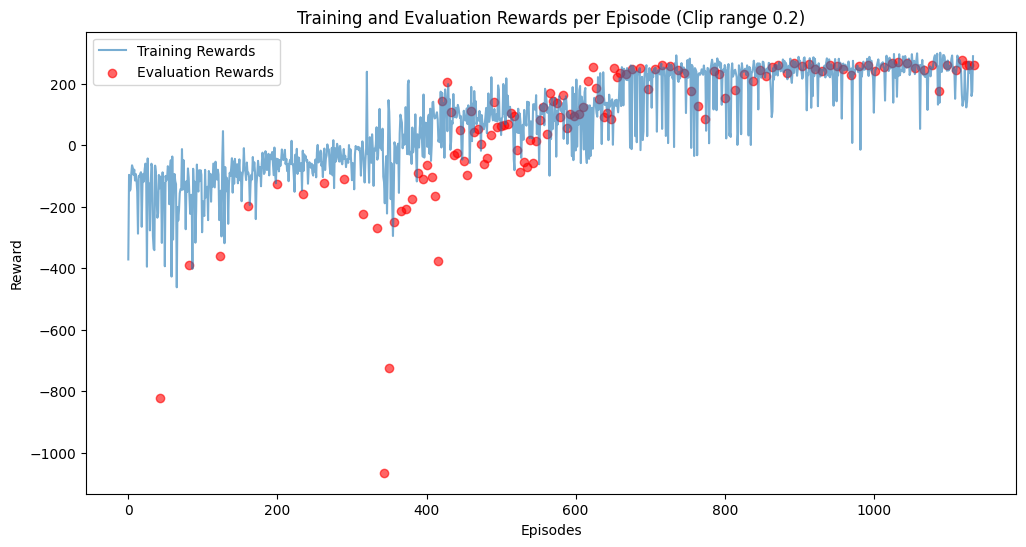

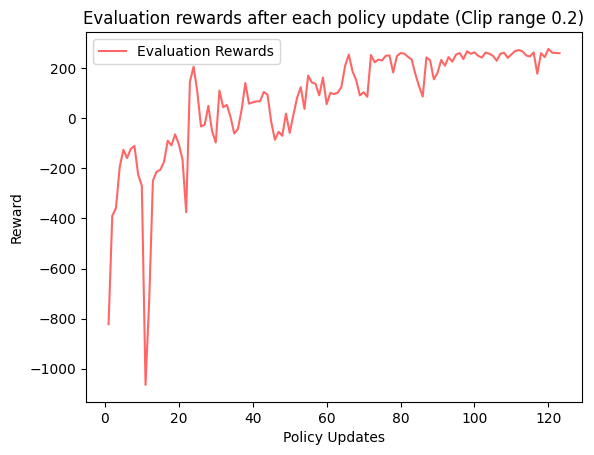

In [260]:
# Unpack episode numbers and rewards for training
train_episodesc2, train_rewardsc2 = zip(*train_episode_rewardsc2)
print('Final training reward: ', train_rewardsc2[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodesc2, eval_rewardsc2 = zip(*eval_episode_rewardsc2)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_rewardc2, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_rewardc2)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodesc2, train_rewardsc2, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodesc2, eval_rewardsc2, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Clip range 0.2)')
plt.legend()
plt.show()

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewardsc2)+1), eval_rewardsc2, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Clip range 0.2)')
plt.legend()
plt.show()

In [261]:
model_name = "ppo-LunarLander-v2_default_c2"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default_c2.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default_c2"
model.save(drive_model_path)

np.save("train_episode_rewards_c2.npy", train_episode_rewardsc2)
np.save("eval_episode_rewards_c2.npy", eval_episode_rewardsc2)
files.download('/content/train_episode_rewards_c2.npy')
files.download('/content/eval_episode_rewards_c2.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards_c2.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards_c2.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 3. Clip range 0.3

In [7]:
class CustomCallback(BaseCallback):
    def __init__(self, verbose=0):
        super(CustomCallback, self).__init__(verbose)
        self.training_rewards = []

    def _on_step(self):
        # Check if callback is being called
        #print("Callback step triggered")

        # Iterate over the infos array
        infos = self.locals.get("infos", [])
        for info in infos: # because of the stupid vectorised DummyVecEnv
            if "episode" in info.keys():
                episode_reward = info['episode']['r']
                print("Episode data:", episode_reward)  # Inspect episode data
                self.training_rewards.append(episode_reward)
        return True

def evaluate_model(model, num_episodes=10, deterministic=True):
    # Create a separate environment for evaluation
    eval_env = Monitor(gym.make("LunarLander-v2")) # default env

    # Evaluate the policy
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=num_episodes, deterministic=deterministic)

    # Close the evaluation environment
    eval_env.close()

    return mean_reward, std_reward

envc3 = Monitor(gym.make("LunarLander-v2")) # Monitor for callbacks to get training rewards after each episode ends

model = PPO(
    policy = 'MlpPolicy', # input is a vector
    env = envc3,
    n_steps = 1024, # 1024 state transitions for an update
    batch_size = 64,
    n_epochs = 4,
    gamma = 0.999, # Gamma of 0.999
    gae_lambda = 0.98,
    ent_coef = 0.01,
    verbose=1,
    learning_rate = 0.001, # Learning rate of 0.001
    clip_range = 0.3) # clip_range of 0.3

Using cuda device
Wrapping the env in a DummyVecEnv.


In [8]:
callback = CustomCallback()
total_timesteps = 500000
eval_freq = 1024*4  # Evaluate only after 4 policy updates
train_episode_countc3 = 0
train_episode_rewardsc3 = []  # List to store (episode_number, reward)
eval_episode_rewardsc3 = []   # List to store (episode_number, reward)

for start_step in range(0, total_timesteps, eval_freq):
    # Train the model
    model.learn(total_timesteps=eval_freq, reset_num_timesteps=False, callback=callback) # callback auto captures training rewards from each elapsed episode, reset_num_timesteps=False for partial fitting

    # Update training rewards and count
    train_rewards = callback.training_rewards
    #print("Train rewards: ", train_rewards)
    for r in train_rewards:
        train_episode_rewardsc3.append((train_episode_countc3, r)) # record training rewards and its corresponding episode
        train_episode_countc3 += 1
    callback.training_rewards.clear()  # Clearing the training rewards

    # Evaluate the model
    eval_reward, _ = evaluate_model(model, num_episodes=3) # returns average reward of 3 separate episodes on diff env
    eval_episode_rewardsc3.append((train_episode_countc3, eval_reward)) # evaluation is on last episode recorded by callback
    print("Evaluation reward: ", eval_reward)
    print("Number of evaluations thus far: ", len(eval_episode_rewardsc3))
    print("Number of elapsed episodes: ", train_episode_countc3)

Streaming output truncated to the last 5000 lines.
|    ep_len_mean          | 506          |
|    ep_rew_mean          | 108          |
| time/                   |              |
|    fps                  | 566          |
|    iterations           | 4            |
|    time_elapsed         | 7            |
|    total_timesteps      | 266240       |
| train/                  |              |
|    approx_kl            | 0.0041303257 |
|    clip_fraction        | 0            |
|    clip_range           | 0.3          |
|    entropy_loss         | -0.789       |
|    explained_variance   | 0.861        |
|    learning_rate        | 0.001        |
|    loss                 | 85.1         |
|    n_updates            | 1036         |
|    policy_gradient_loss | -0.00254     |
|    value_loss           | 376          |
------------------------------------------
Evaluation reward:  166.20122966666668
Number of evaluations thus far:  65
Number of elapsed episodes:  522
Episode data: 46.196886


Final training reward:  124.225862
Final mean validation reward:  224.1352726


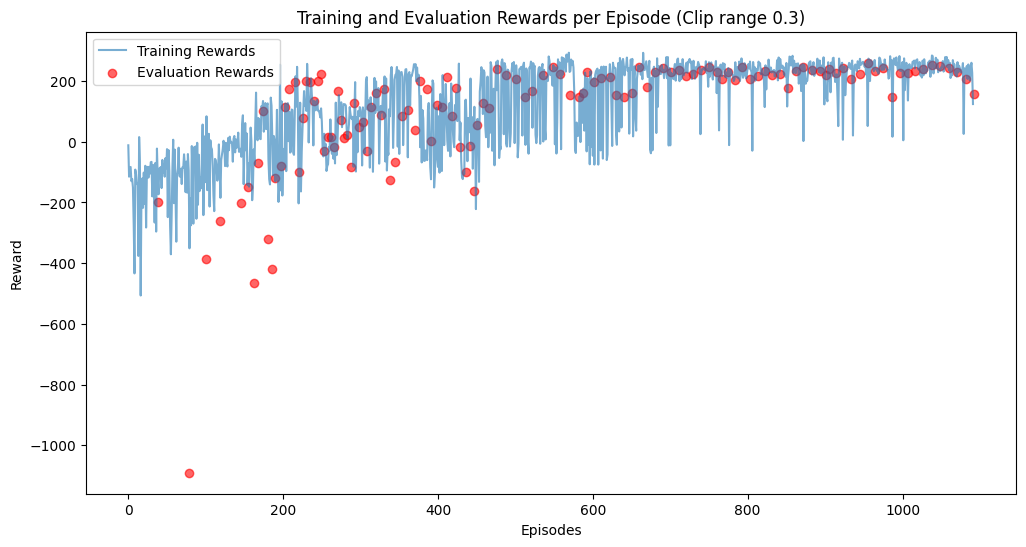

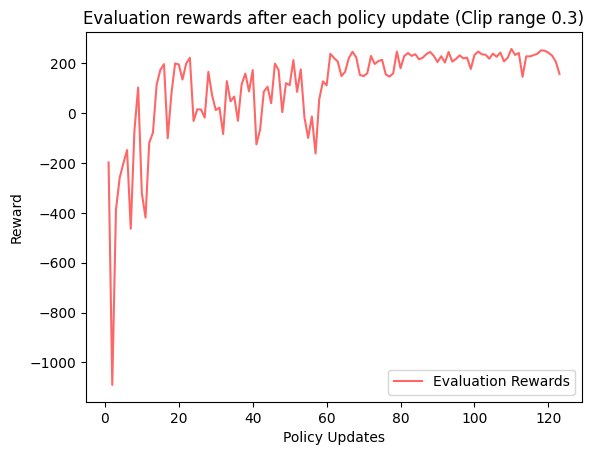

In [14]:
# Unpack episode numbers and rewards for training
train_episodesc3, train_rewardsc3 = zip(*train_episode_rewardsc3)
print('Final training reward: ', train_rewardsc3[-1])

# Unpack episode numbers and rewards for evaluation
eval_episodesc3, eval_rewardsc3 = zip(*eval_episode_rewardsc3)

# Evaluation reward
eval_env = Monitor(gym.make("LunarLander-v2"))
mean_rewardc3, _ = evaluate_policy(model, eval_env, n_eval_episodes=10, deterministic=True) # evaluate on 10 env in parallel
print(f"Final mean validation reward: ", mean_rewardc3)

plt.figure(figsize=(12, 6))

# Plot training rewards
plt.plot(train_episodesc3, train_rewardsc3, label='Training Rewards', alpha=0.6)

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.scatter(eval_episodesc3, eval_rewardsc3, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Episodes')
plt.ylabel('Reward')
plt.title('Training and Evaluation Rewards per Episode (Clip range 0.3)')
plt.legend()
plt.show()

# Plot evaluation rewards
# Use scatter for evaluation to distinguish it from training
plt.plot(range(1,len(eval_rewardsc3)+1), eval_rewardsc3, color='red', label='Evaluation Rewards', alpha=0.6)

plt.xlabel('Policy Updates')
plt.ylabel('Reward')
plt.title('Evaluation rewards after each policy update (Clip range 0.3)')
plt.legend()
plt.show()

In [15]:
model_name = "ppo-LunarLander-v2_default_c3"
model.save(model_name)

from google.colab import files
files.download('/content/ppo-LunarLander-v2_default_c3.zip')

from google.colab import drive
drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/ppo-LunarLander-v2_default_c3"
model.save(drive_model_path)

np.save("train_episode_rewards_c3.npy", train_episode_rewardsc3)
np.save("eval_episode_rewards_c3.npy", eval_episode_rewardsc3)
files.download('/content/train_episode_rewards_c3.npy')
files.download('/content/eval_episode_rewards_c3.npy')

drive.mount('/content/drive')
drive_model_path = "/content/drive/My Drive/Colab Notebooks/train_episode_rewards_c3.npy"
model.save(drive_model_path)
drive_model_path = "/content/drive/My Drive/Colab Notebooks/eval_episode_rewards_c3.npy"
model.save(drive_model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
